In [2]:
! pip install imblearn

import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime as dt
import statsmodels.formula.api as sm
import warnings 
import itertools

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [3]:
! pip install imblearn

In [4]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,5

In [5]:
warnings.filterwarnings('ignore')

# Description of Variables

- Age: The age of the employee. (Numerical)
- Attrition: Whether or not the employee has left the organization. (Categorical)
- BusinessTravel: The frequency of business travel for the employee. (Categorical)
- DailyRate: The daily rate of pay for the employee. (Numerical)
- Department: The department the employee works in. (Categorical)
- DistanceFromHome: The distance from home in miles for the employee. (Numerical)
- Education: The level of education achieved by the employee. (Categorical)
- EducationField: The field of study for the employee's education. (Categorical)
- EmployeeCount: The total number of employees in the organization. (Numerical)
- EmployeeNumber: A unique identifier for each employee profile. (Numerical)
- EnvironmentSatisfaction: The employee's satisfaction with their work environment. (Categorical)
- Gender: The gender of the employee. (Categorical)
- HourlyRate: The hourly rate of pay for the employee. (Numerical)
- JobInvolvement: The level of involvement required for the employee's job. (Categorical)
- JobLevel: The job level of the employee. (Categorical)
- JobRole: The role of the employee in the organization. (Categorical)
- JobSatisfaction: The employee's satisfaction with their job. (Categorical)
- MaritalStatus: The marital status of the employee. (Categorical)
- MonthlyIncome: The monthly income of the employee. (Numerical)
- MonthlyRate: The monthly rate of pay for the employee. (Numerical)
- NumCompaniesWorked: The number of companies the employee has worked for. (Numerical)
- Over18: Whether or not the employee is over 18. (Categorical)
- OverTime: Whether or not the employee works overtime. (Categorical)
- PercentSalaryHike: The percentage of salary hike for the employee. (Numerical)
- PerformanceRating: The performance rating of the employee. (Categorical)
- RelationshipSatisfaction: The employee's satisfaction with their relationships. (Categorical)
- StandardHours: The standard hours of work for the employee. (Numerical)
- StockOptionLevel: The stock option level of the employee. (Numerical)
- TotalWorkingYears: The total number of years the employee has worked. (Numerical)
- TrainingTimesLastYear: The number of times the employee was taken for training in the last year. (Numerical)
- WorkLifeBalance: The employee's perception of their work-life balance. (Categorical)
- YearsAtCompany: The number of years the employee has been with the company. (Numerical)
- YearsInCurrentRole: The number of years the employee has been in their current role. (Numerical)
- YearsSinceLastPromotion: The number of years since the employee's last promotion. (Numerical)
- YearsWithCurrManager: The number of years the employee has been with their current manager. (Numerical)

- make people who leave the job 1 (bc there are far less of them)
- min false neg rate to maximizew recall 
- precision recall is a good metric to optimize (most imp recall)
- minimize ppl who will leave

In [6]:
df=pd.read_csv("data/HR_Analytics.csv")

In [7]:
#Load data
df=pd.read_csv("data/HR_Analytics.csv")
df = pd.get_dummies(df, columns = ["Attrition"])
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,0,8,0,1,6,4,0,5,0,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,1,10,3,3,10,7,1,7,1,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,0,7,3,3,0,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,0,8,3,3,8,7,3,0,1,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,1,6,3,3,2,2,2,2,1,0


In [8]:
#Keep the dummy column where employees leaving = 1, because there are far less of them and we want to minimize FNR and recall
df = df.drop(["Attrition_No"], axis = 1)

In [9]:
#Splitting up data into train and test data - train has 70% of values and test has 30%
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, random_state=25)

print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

No. of training examples: 1029
No. of testing examples: 441


In [10]:
#Printing the ratio of No's and Yes's to the response variable (Attrition) for train and test to make sure they are similar
print(train.Attrition_Yes.value_counts()[1]/train.Attrition_Yes.value_counts()[0])
print(test.Attrition_Yes.value_counts()[1]/test.Attrition_Yes.value_counts()[0])

0.1937354988399072
0.18867924528301888


In [11]:
#Shape of data
print(train.shape)
print(test.shape)

(1029, 35)
(441, 35)


In [12]:
#There are zero missing values that need to be filled in either data set
print(train.isna().sum())
print(test.isna().sum())

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [13]:
#All column names in dataframe
train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_Yes'],
      dtype='object')

In [14]:
#Finding correlations between variables and response
train.corrwith(train.Attrition_Yes).sort_values(ascending = False)

Attrition_Yes               1.000000
DistanceFromHome            0.065658
NumCompaniesWorked          0.029205
MonthlyRate                 0.001126
PerformanceRating          -0.007033
EmployeeNumber             -0.020580
PercentSalaryHike          -0.021023
TrainingTimesLastYear      -0.036240
WorkLifeBalance            -0.039167
Education                  -0.042102
HourlyRate                 -0.044921
YearsSinceLastPromotion    -0.048035
RelationshipSatisfaction   -0.061508
DailyRate                  -0.081930
JobSatisfaction            -0.098817
EnvironmentSatisfaction    -0.113397
JobInvolvement             -0.121431
StockOptionLevel           -0.145659
YearsAtCompany             -0.150960
YearsWithCurrManager       -0.153679
MonthlyIncome              -0.164937
JobLevel                   -0.169904
YearsInCurrentRole         -0.178133
Age                        -0.182642
TotalWorkingYears          -0.185703
EmployeeCount                    NaN
StandardHours                    NaN
d

In [15]:
train.Over18.value_counts()

Y    1029
Name: Over18, dtype: int64

In [16]:
#Drop employee count, over 18 and standard hours because they are the same value for every person
train = train.drop(["EmployeeCount", "StandardHours", "Over18"], axis = 1)
test = test.drop(["EmployeeCount", "StandardHours", "Over18"], axis = 1)
train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes'],
      dtype='object')

 OverTime, JobLevel, StockOptionLevel, JobInvolvement, BusinessTravel, NumCompaniesWorked, JobSatisfaction, EnvironmentSatisfaction, EducationField, WorkLifeBalance, Age, DistanceFromHome, YearsSinceLastPromotion, YearsInCurrentRole, YearsAtCompany, TotalWorkingYears, YearsWithCurrManager, Gender, and PercentSalaryHike

In [17]:
interactions = train.loc[:, ['OverTime', 'JobLevel', 'StockOptionLevel', 'JobInvolvement', 'BusinessTravel', 'NumCompaniesWorked', 'JobSatisfaction', 'EnvironmentSatisfaction', 'EducationField', 'WorkLifeBalance', 'Age', 'DistanceFromHome', 'YearsSinceLastPromotion', 'YearsInCurrentRole', 'YearsAtCompany', 'TotalWorkingYears', 'YearsWithCurrManager', 'Gender', 'PercentSalaryHike']]

In [18]:
#sns.pairplot(interactions)

In [19]:
#interaction terms: YearsAtCompany*TotalWorkingYears Age*TotalWorkingYears, Age*YearsAtCompany,

In [20]:
interactions.corr()

,JobLevel,StockOptionLevel,JobInvolvement,NumCompaniesWorked,JobSatisfaction,EnvironmentSatisfaction,WorkLifeBalance,Age,DistanceFromHome,YearsSinceLastPromotion,YearsInCurrentRole,YearsAtCompany,TotalWorkingYears,YearsWithCurrManager,PercentSalaryHike
JobLevel,1.000000,0.006959,-0.009112,0.153544,0.021031,0.006035,0.014191,0.511042,0.011966,0.309912,0.365351,0.497739,0.781987,0.336493,-0.008855
StockOptionLevel,0.006959,1.000000,0.067397,0.018944,0.000795,0.022180,0.026797,0.062264,0.048093,0.007439,0.034791,0.020755,0.011130,0.023468,0.007738
JobInvolvement,-0.009112,0.067397,1.000000,0.018458,-0.016585,-0.033744,0.003785,0.051137,0.003617,-0.005133,0.040467,0.006205,0.024000,0.048525,0.037431
NumCompaniesWorked,0.153544,0.018944,0.018458,1.000000,-0.031017,0.026698,-0.004100,0.299410,-0.051574,-0.064959,-0.095547,-0.134277,0.248273,-0.119842,-0.002508
JobSatisfaction,0.021031,0.000795,-0.016585,-0.031017,1.000000,-0.024880,-0.017535,0.031203,-0.027867,-0.001105,0.010160,0.019719,-0.004279,-0.005361,0.028391
EnvironmentSatisfaction,0.006035,0.022180,-0.033744,0.026698,-0.024880,1.000000,0.027154,0.032225,0.011353,0.005821,-0.017946,-0.013449,0.004853,-0.004627,-0.027728
WorkLifeBalance,0.014191,0.026797,0.003785,-0.004100,-0.017535,0.027154,1.000000,-0.022323,-0.022224,0.004330,0.030942,-0.000269,-0.009416,0.008794,-0.006314
Age,0.511042,0.062264,0.051137,0.299410,0.031203,0.032225,-0.022323,1.000000,-0.019316,0.188573,0.213709,0.291780,0.672094,0.195552,0.029420
DistanceFromHome,0.011966,0.048093,0.003617,-0.051574,-0.027867,0.011353,-0.022224,-0.019316,1.000000,0.019615,0.028074,0.023143,0.004865,0.032785,0.068196
YearsSinceLastPromotion,0.309912,0.007439,-0.005133,-0.064959,-0.001105,0.005821,0.004330,0.188573,0.019615,1.000000,0.569019,0.617816,0.379931,0.527536,0.005186


# Visualizations of initial thoughts on variables that could be correlated

In [21]:
# calculate the null count for each column
null_count = df.isnull().sum()
null_count.name = 'count of null' 

# find the datatype for each column
dtype = df.dtypes
dtype.name = 'data type'

# describe the dataframe to get other statistics
data_desc = df.describe(include='all', datetime_is_numeric=True)

# remove count, freq, mean, std, 25%, 50%, and 75% percentiles
data_desc = data_desc.drop(['count', 'freq', 'std', '25%', '75%', 'top'], axis=0)

# transpose the dataframe to prevent the dataframe from being too wide.
data_desc_T = data_desc.T

# add the row of null count and datatype to the dataframe
data_desc_T = pd.concat([dtype, null_count, data_desc_T], axis=1)

# order the summary statistics table by datatype and count of null
data_desc_T = data_desc_T.sort_values(['data type', 'count of null'])

# show the summary statistics table
data_desc_T

,data type,count of null,unique,mean,min,50%,max
Attrition_Yes,uint8,0,NaN,0.161224,0.0,0.0,1.0
Age,int64,0,NaN,36.92381,18.0,36.0,60.0
DailyRate,int64,0,NaN,802.485714,102.0,802.0,1499.0
DistanceFromHome,int64,0,NaN,9.192517,1.0,7.0,29.0
Education,int64,0,NaN,2.912925,1.0,3.0,5.0
EmployeeCount,int64,0,NaN,1.0,1.0,1.0,1.0
EmployeeNumber,int64,0,NaN,1024.865306,1.0,1020.5,2068.0
EnvironmentSatisfaction,int64,0,NaN,2.721769,1.0,3.0,4.0
HourlyRate,int64,0,NaN,65.891156,30.0,66.0,100.0
JobInvolvement,int64,0,NaN,2.729932,1.0,3.0,4.0


In [22]:
df = df.drop(columns = ['Over18','StandardHours','EmployeeCount'])
# We should just drop these columns because they only have 1 unique values and contain no information

<AxesSubplot:>

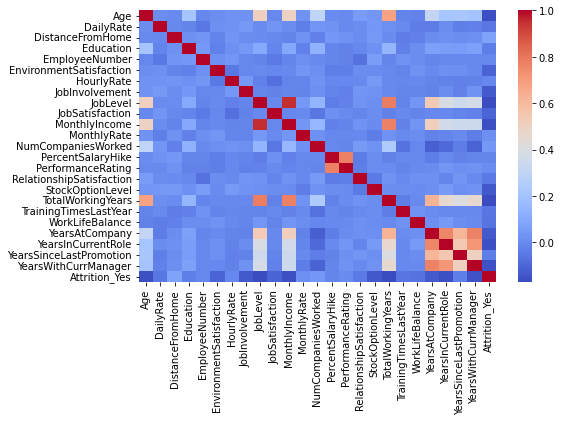

In [23]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')

In [24]:
# count the number of attrition entries
attrition_counts = df['Attrition_Yes'].value_counts()

# calculate the percentage out of total entries
attrition_percent = attrition_counts/attrition_counts.sum()

# make labels for plots
labels = ['Attrition_No-'+str((attrition_percent[0]*100).round(2))+'%', 'Attrition_Yes-'+str((attrition_percent[1]*100).round(2))+'%']

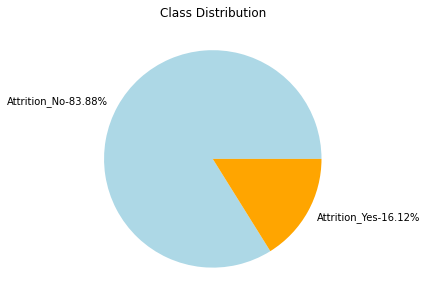

In [25]:
# check for class imbalance of the outcome variable
plt.pie(attrition_counts, labels=labels, colors=['lightblue', 'orange'])
plt.title('Class Distribution')
plt.show()

class imbalance in the outcome variable, maybe do resampling techniques: This involves either oversampling the minority class by duplicating existing examples or undersampling the majority class by reducing the number of examples. Common resampling techniques include random oversampling, random undersampling, and Synthetic Minority Over-sampling Technique (SMOTE). Do this before training the model

<AxesSubplot:xlabel='Attrition_Yes', ylabel='MonthlyIncome'>

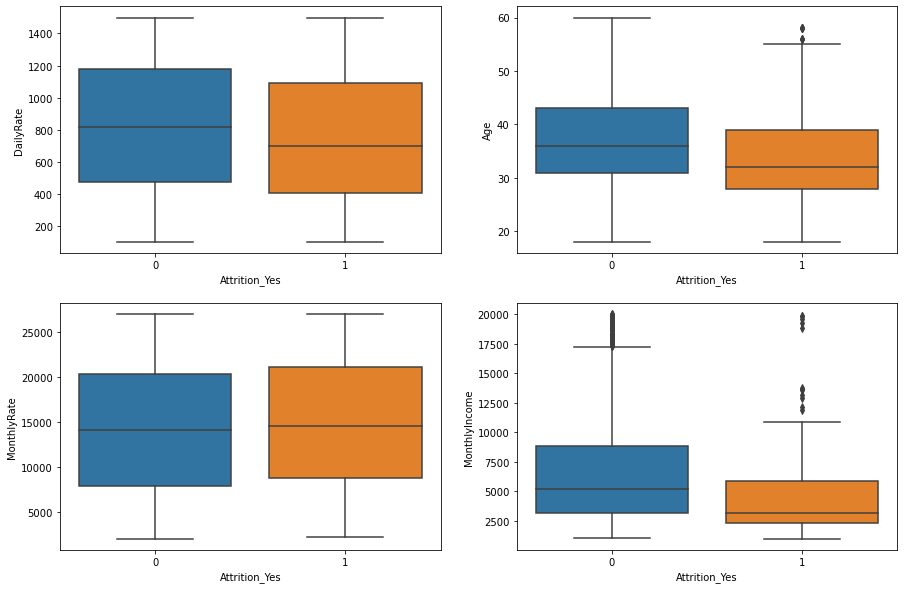

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
sns.boxplot(data=df, x='Attrition_Yes', y='DailyRate', ax=axes[0, 0])
sns.boxplot(data=df, x='Attrition_Yes', y='Age', ax=axes[0, 1])
sns.boxplot(data=df, x='Attrition_Yes', y='MonthlyRate', ax=axes[1, 0])
sns.boxplot(data=df, x='Attrition_Yes', y='MonthlyIncome', ax=axes[1, 1])

In machine learning, having a class imbalance problem can lead to biased models and poor predictive performance. If one class has significantly fewer examples than the other classes, the model may not learn enough from the minority class and may struggle to generalize well to new data.
In our case, having only 16% of Attrition = Yes suggests that our dataset has a significant class imbalance. This can lead to issues such as too many false negatives and reduced model performance overall.
To address this class imbalance problem, we chose to oversample the minority class, as shown in the code below.

In [83]:
# separate the target variable and predictor variables
X = df.drop(columns = ['Attrition_Yes'], axis=1)
y = df['Attrition_Yes']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# perform oversampling on the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# print the number of examples in each class before and after oversampling
print("Before oversampling:")
print(y_train.value_counts())
print("After oversampling:")
print(y_train_resampled.value_counts())

Before oversampling:
0    978
1    198
Name: Attrition_Yes, dtype: int64
After oversampling:
0    978
1    978
Name: Attrition_Yes, dtype: int64


In [84]:
y_train_resampled.name = 'Attrition_Yes'
train = pd.concat([X_train_resampled, pd.DataFrame(y_train_resampled)],axis =1)

In [85]:
column_list = X_train_resampled.columns.to_list()
train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes'],
      dtype='object')

In [86]:
formula = 'Attrition_Yes~'+'+'.join(column_list)

In [57]:
#logistic regression with all predictors
logit_model = smf.logit(formula=formula, data=train).fit()
logit_model.summary()

         Current function value: 0.426895
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Attrition_Yes   No. Observations:                 1956
Model:                          Logit   Df Residuals:                     1910
Method:                           MLE   Df Model:                           45
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                  0.3841
Time:                        18:11:03   Log-Likelihood:                -835.01
converged:                      False   LL-Null:                       -1355.8
Covariance Type:            nonrobust   LLR p-value:                7.479e-189
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              -10.7724    201.775     -0.053      0.957    -406.244     384.699
BusinessTravel[T.Travel_Frequently]      1.8105      0.286      6.333      0.000       1.250       2.371
BusinessTravel[T.Travel_Rarely]          1.1005      0.261      4.223      0.000       0.590       1.611
Department[T.Research & Development]    12.8508    201.771      0.064      0.949    -382.614     408.315
Department[T.Sales]                     13.3334    201.772      0.066      0.947    -382.131     408.798
EducationField[T.Life Sciences]         -1.2724      0.568     -2.239      0.025      -2.386      -0.159
EducationField[T.Marketing]             -1.1581      0.614     -1.885      0.059      -2.362       0.046
EducationField[T.Medical]               -0.9597      0.563     -1.705      0.088      -2.063       0.143
EducationField[T.Other]                 -0.5149      0.606     -0.849      0.396      -1.704       0.674
EducationField[T.Technical Degree]       0.4617      0.586      0.788      0.431      -0.687       1.611
Gender[T.Male]                           0.4764      0.131      3.633      0.000       0.219       0.733
JobRole[T.Human Resources]              14.7253    201.772      0.073      0.942    -380.741     410.191
JobRole[T.Laboratory Technician]         2.3865      0.346      6.894      0.000       1.708       3.065
JobRole[T.Manager]                      -0.0570      0.626     -0.091      0.927      -1.284       1.170
JobRole[T.Manufacturing Director]        0.9077      0.357      2.540      0.011       0.207       1.608
JobRole[T.Research Director]            -1.1267      0.620     -1.816      0.069      -2.342       0.089
JobRole[T.Research Scientist]            1.1633      0.346      3.364      0.001       0.486       1.841
JobRole[T.Sales Executive]               1.0189      0.742      1.373      0.170      -0.436       2.474
JobRole[T.Sales Representative]          2.4418      0.790      3.090      0.002       0.893       3.991
MaritalStatus[T.Married]                 0.8121      0.190      4.270      0.000       0.439       1.185
MaritalStatus[T.Single]                  1.8014      0.245      7.350      0.000       1.321       2.282
OverTime[T.Yes]                          2.0857      0.140     14.905      0.000       1.811       2.360
Age                                     -0.0191      0.009     -2.013      0.044      -0.038      -0.001
DailyRate                               -0.0002      0.000     -1.215      0.224      -0.001       0.000
DistanceFromHome                         0.0424      0.008      5.330      0.000       0.027       0.058
Education                                0.0356      0.062      0.573      0.566      -0.086       0.157
EmployeeNumber                       -2.723e-05      0.000     -0.253      0.800      -0.000       0.000
EnvironmentSatisfaction                 -0.3937      0.061     -6.457      0.000      -0.51

confusion matrix for this model. Call it baseline model. Then, do transformations from here using graphs for justification.

In [90]:
#This should be deleted

##Making all predictors dummy variables

#Function to develop a model based on all predictors in predictor_subset
X = X.rename(columns=lambda x: x.strip())

#train_num = train.copy()

#diff num for diff job roles, 1 = Human Resources
#X['JobRole'] = X['JobRole'].apply(
   # lambda x: 9 if x=='Sales Executive' else 8 if x == 'Research Scientist' else 7 if x == 'Laboratory Technician' 
   # else 6 if x == 'Manufacturing Director' else 5 if x == 'Healthcare Representative' else 4 if x == 'Manager' 
   # else 3 if x == 'Sales Representative' else 2 if x == 'Research Director' else 1)
#BusinessTravel = 3 if Travel_Frequently, 2 if Travel_Rarely, 1 if no travel
#X['BusinessTravel'] = X['BusinessTravel'].apply(
   #lambda x: 3 if x=='Travel_Frequently' else 2 if x == 'Travel_Rarely' else 1)
# Department = 3 for R&D, 2 for Sales, and 1 for HR
#X['Department'] = X['Department'].apply(
   # lambda x: 3 if x=='Research & Development' else 2 if x == 'Sales' else 1)
# different numbers assigned to every field, 1 = Human Resources
#X['EducationField'] = X['EducationField'].apply(
   # lambda x: 6 if x=='Life Sciences' else 5 if x == 'Medical' else 4 if x == 'Marketing' 
   # else 3 if x == 'Technical Degree' else 2 if x == 'Other' else 1)
# MaritalStatus = 1 if Divorced
#X['MaritalStatus'] = X['MaritalStatus'].apply(
   # lambda x: 3 if x=='Married' else 2 if x == 'Single' else 1)
#X['Gender'] = X['Gender'].apply(lambda x: 1 if x=='Male' else 0)
# OverTime = 1 if Yes, 0 if no
#X['OverTime'] = X['OverTime'].apply(lambda x: 1 if x=='Yes' else 0) #1 if left org

#trying to make train categorical
# diff num for diff job roles, 1 = Human Resources
#train_num['JobRole'] = train_num['JobRole'].apply(
    #lambda x: 9 if x=='Sales Executive' else 8 if x == 'Research Scientist' else 7 if x == 'Laboratory Technician' 
   # else 6 if x == 'Manufacturing Director' else 5 if x == 'Healthcare Representative' else 4 if x == 'Manager' 
   # else 3 if x == 'Sales Representative' else 2 if x == 'Research Director' else 1)
# BusinessTravel = 3 if Travel_Frequently, 2 if Travel_Rarely, 1 if no travel
#train_num['BusinessTravel'] = train_num['BusinessTravel'].apply(
    #lambda x: 3 if x=='Travel_Frequently' else 2 if x == 'Travel_Rarely' else 1)
# Department = 3 for R&D, 2 for Sales, and 1 for HR
#train_num['Department'] = train_num['Department'].apply(
   # lambda x: 3 if x=='Research & Development' else 2 if x == 'Sales' else 1)
# different numbers assigned to every field, 1 = Human Resources
#train_num['EducationField'] = train_num['EducationField'].apply(
   # lambda x: 6 if x=='Life Sciences' else 5 if x == 'Medical' else 4 if x == 'Marketing' 
    #else 3 if x == 'Technical Degree' else 2 if x == 'Other' else 1)
# MaritalStatus = 1 if Divorced
#train_num['MaritalStatus'] = train_num['MaritalStatus'].apply(
    #lambda x: 3 if x=='Married' else 2 if x == 'Single' else 1)
#train_num['Gender'] = train_num['Gender'].apply(lambda x: 1 if x=='Male' else 0)
# OverTime = 1 if Yes, 0 if no
#train_num['OverTime'] = train_num['OverTime'].apply(lambda x: 1 if x=='Yes' else 0) #1 if left org



# Forward selection requires quantitative variables so we have to make the df into dummies


#X2 = pd.get_dummies(X)
#Xcopy = X.copy()
#X = X2.copy()
#X.columns = X.columns.str.replace('-', '')
#X.columns = X.columns.str.replace(' ', '')

X = pd.get_dummies(X, drop_first = True)
X.columns = X.columns.str.replace('-', '')
X.columns = X.columns.str.replace(' ', '')

X

#X=X.drop(['BusinessTravel_NonTravel'], axis = 1)
#X['JobRole'] = X['JobRole'].astype('|S')
#X['JobRole'].strip()
#X['JobRole'].str.strip()
#X['JobRole'].dtype
#X['JobRole'] = X['JobRole'].astype(str)
#X['JobRole'].dtype
#train.Attrition_Yes

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_LaboratoryTechnician,JobRole_Manager,JobRole_ManufacturingDirector,JobRole_ResearchDirector,JobRole_ResearchScientist,JobRole_SalesExecutive,JobRole_SalesRepresentative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,2,3,61,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,4,92,2,1,3,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,5,4,56,3,1,3,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,7,1,40,3,1,2,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,2061,3,41,4,2,4,...,1,0,0,0,0,0,0,1,0,0
1466,39,613,6,1,2062,4,42,2,3,1,...,0,0,0,0,0,0,0,1,0,0
1467,27,155,4,3,2064,2,87,4,2,2,...,0,0,1,0,0,0,0,1,0,1
1468,49,1023,2,3,2065,4,63,2,2,2,...,0,0,0,0,0,1,0,1,0,0


In [91]:
X.shape

(1470, 45)

In [92]:
X.dtypes

Age                                 int64
DailyRate                           int64
DistanceFromHome                    int64
Education                           int64
EmployeeNumber                      int64
EnvironmentSatisfaction             int64
HourlyRate                          int64
JobInvolvement                      int64
JobLevel                            int64
JobSatisfaction                     int64
MonthlyIncome                       int64
MonthlyRate                         int64
NumCompaniesWorked                  int64
PercentSalaryHike                   int64
PerformanceRating                   int64
RelationshipSatisfaction            int64
StockOptionLevel                    int64
TotalWorkingYears                   int64
TrainingTimesLastYear               int64
WorkLifeBalance                     int64
YearsAtCompany                      int64
YearsInCurrentRole                  int64
YearsSinceLastPromotion             int64
YearsWithCurrManager              

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
Var = X[X.columns]
Var = add_constant(Var)
vif_data = pd.DataFrame()
vif_data["feature"] = Y.columns

for i in range(len(Var.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(Var.values, i)

print(vif_data)

                             feature         VIF
0                              const  448.928289
1                                Age    2.083404
2                          DailyRate    1.037997
3                   DistanceFromHome    1.023764
4                          Education    1.085391
5                     EmployeeNumber    1.035944
6            EnvironmentSatisfaction    1.030723
7                         HourlyRate    1.027692
8                     JobInvolvement    1.032529
9                           JobLevel   14.157614
10                   JobSatisfaction    1.027094
11                     MonthlyIncome   18.152179
12                       MonthlyRate    1.021823
13                NumCompaniesWorked    1.282293
14                 PercentSalaryHike    2.564495
15                 PerformanceRating    2.550755
16          RelationshipSatisfaction    1.032391
17                  StockOptionLevel    1.922337
18                 TotalWorkingYears    5.012936
19             Train

In [94]:
logit_model.llf

-835.007351219576

In [95]:
#Drop correlated variables (VIF > 5)
#Choose between JobLevel, MonthlyIncome, and TotalWorkingYears

In [100]:
X_train = pd.concat([X,y], axis = 1)

In [107]:
#Function to develop a model based on all predictors in predictor_subset
# X = train.drop(["Attrition_Yes",'JobRole','OverTime'], axis = 1)
## X = X.rename(columns=lambda x: x.strip())
## X['JobRole'] = X['JobRole'].astype(str)

X_train = X_train.apply(lambda x: x.str.strip() if isinstance(x.iloc[0], str) else x)
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    #model = sm.ols('Attrition_Yes~' + '+'.join(predictor_subset),data = train_num).fit()
    logit_model = sm.logit(formula = 'Attrition_Yes~' + '+'.join(predictor_subset),data = X_train).fit() #Developing logistic regression model
    llf = logit_model.llf
    return {"logit_model":logit_model, "Log-Likelihood":llf}

In [108]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
import time
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_train.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Log-Likelihood'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [109]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Log-Likelihood", "logit_model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["logit_model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

#make dummies for all categorical variables
#change R-squared to log likelihood, keep AIC and BIC
#show all three graphs in
#check for multi-collinearity among all variables first, remove the ones that are colinear (decide which one is most important), then do forward stepwise - use VIF score, (email Krish about what threshold to use, 5 and below you should be good) if they're above the threshold point, remove them
#change predictors to be dummies rather than just dummy variables because forward selection might decide that one of them isn't important and not include them - less of a priority, but if we have time

In [111]:
models_best = forward_selection()

Optimization terminated successfully.
         Current function value: 0.428257
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.440087
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.438776
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.441205
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.441639
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.436422
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.441671
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.433487
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.425133
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.436413
  

PatsyError: Error evaluating factor: NameError: name 'Department_Research' is not defined
    Attrition_Yes~Department_Research&Development
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

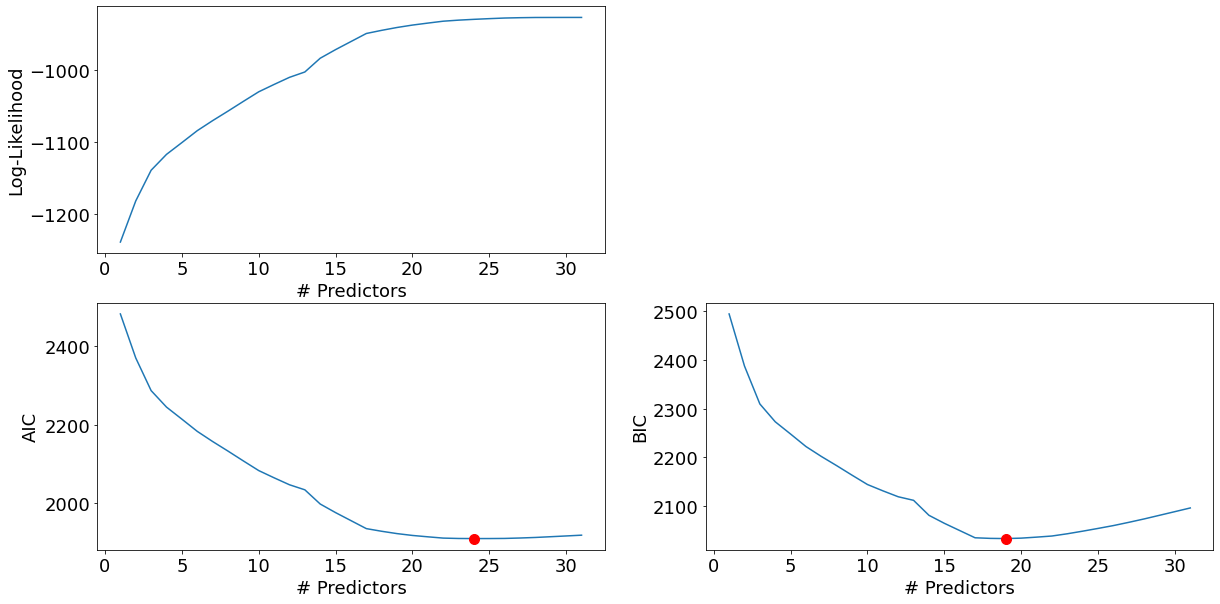

In [50]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Log-Likelihood"])
    plt.xlabel('# Predictors')
    plt.ylabel('Log-Likelihood')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    """
    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('psuedo rsquared')
    """

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()

In [51]:
best_fwd_reg_model = models_best['logit_model'][19]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Attrition_Yes   No. Observations:                 1956
Model:                          Logit   Df Residuals:                     1936
Method:                           MLE   Df Model:                           19
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                  0.3063
Time:                        16:31:47   Log-Likelihood:                -940.51
converged:                       True   LL-Null:                       -1355.8
Covariance Type:            nonrobust   LLR p-value:                6.813e-164
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   5.0550      0.634      7.979      0.000       3.813       6.297
OverTime                    1.7869      0.124     14.427      0.000       1.544       2.030
JobLevel                   -0.3432      0.091     -3.789      0.000      -0.521      -0.166
StockOptionLevel           -0.5915      0.070     -8.454      0.000      -0.729      -0.454
JobInvolvement             -0.4920      0.083     -5.909      0.000      -0.655      -0.329
BusinessTravel              0.7218      0.111      6.492      0.000       0.504       0.940
NumCompaniesWorked          0.1781      0.025      7.143      0.000       0.129       0.227
JobSatisfaction            -0.3306      0.053     -6.218      0.000      -0.435      -0.226
EnvironmentSatisfaction    -0.3615      0.055     -6.630      0.000      -0.468      -0.255
EducationField             -0.2367      0.044     -5.413      0.000      -0.322      -0.151
WorkLifeBalance            -0.3755      0.079     -4.783      0.000      -0.529      -0.222
Age                        -0.0217      0.009     -2.535      0.011      -0.039      -0.005
DistanceFromHome            0.0344      0.007      4.776      0.000       0.020       0.048
YearsSinceLastPromotion     0.1267      0.025      5.014      0.000       0.077       0.176
YearsInCurrentRole         -0.1860      0.030     -6.240      0.000      -0.244      -0.128
YearsAtCompany              0.1677      0.022      7.522      0.000       0.124       0.211
TotalWorkingYears          -0.0800      0.018     -4.386      0.000      -0.116      -0.044
YearsWithCurrManager       -0.1346      0.028     -4.795      0.000      -0.190      -0.080
Gender                      0.3610      0.120      3.014      0.003       0.126       0.596
PercentSalaryHike          -0.0455      0.016     -2.813      0.005      -0.077      -0.014
===========================================================================================
"""

# Choosing Best Predictor from Correlated Predictors
- Choose between JobLevel and TotalWorkingYears, don't have to worry about MonthlyIncome because forward selection did not choose it

In [52]:
#Model with all predictors
logit_model_all = sm.logit(formula = 'Attrition_Yes ~ OverTime + JobLevel + StockOptionLevel + JobInvolvement + BusinessTravel + NumCompaniesWorked + JobSatisfaction + EnvironmentSatisfaction + EducationField + WorkLifeBalance + Age + DistanceFromHome + YearsSinceLastPromotion + YearsInCurrentRole + YearsAtCompany + TotalWorkingYears + YearsWithCurrManager + Gender + PercentSalaryHike', data = train).fit() #Developing logistic regression model
logit_model_all.summary()

Optimization terminated successfully.
         Current function value: 0.474589
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Attrition_Yes   No. Observations:                 1956
Model:                          Logit   Df Residuals:                     1931
Method:                           MLE   Df Model:                           24
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                  0.3153
Time:                        16:31:47   Log-Likelihood:                -928.30
converged:                       True   LL-Null:                       -1355.8
Covariance Type:            nonrobust   LLR p-value:                4.897e-165
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               4.6817      0.715      6.543      0.000       3.279       6.084
OverTime[T.Yes]                         1.8341      0.126     14.604      0.000       1.588       2.080
BusinessTravel[T.Travel_Frequently]     1.5922      0.257      6.190      0.000       1.088       2.096
BusinessTravel[T.Travel_Rarely]         0.8690      0.234      3.713      0.000       0.410       1.328
EducationField[T.Life Sciences]        -0.6177      0.411     -1.503      0.133      -1.423       0.188
EducationField[T.Marketing]            -0.0287      0.441     -0.065      0.948      -0.894       0.836
EducationField[T.Medical]              -0.5307      0.412     -1.287      0.198      -1.339       0.278
EducationField[T.Other]                -0.2168      0.457     -0.474      0.635      -1.113       0.679
EducationField[T.Technical Degree]      0.7565      0.442      1.713      0.087      -0.109       1.622
Gender[T.Male]                          0.4041      0.121      3.333      0.001       0.166       0.642
JobLevel                               -0.3281      0.092     -3.557      0.000      -0.509      -0.147
StockOptionLevel                       -0.6060      0.071     -8.504      0.000      -0.746      -0.466
JobInvolvement                         -0.4836      0.085     -5.710      0.000      -0.650      -0.318
NumCompaniesWorked                      0.1846      0.025      7.317      0.000       0.135       0.234
JobSatisfaction                        -0.3170      0.054     -5.870      0.000      -0.423      -0.211
EnvironmentSatisfaction                -0.3467      0.055     -6.294      0.000      -0.455      -0.239
WorkLifeBalance                        -0.3705      0.079     -4.688      0.000      -0.525      -0.216
Age                                    -0.0236      0.009     -2.712      0.007      -0.041      -0.007
DistanceFromHome                        0.0353      0.007      4.830      0.000       0.021       0.050
YearsSinceLastPromotion                 0.1248      0.025      4.914      0.000       0.075       0.175
YearsInCurrentRole                     -0.1962      0.030     -6.520      0.000      -0.255      -0.137
YearsAtCompany                          0.1731      0.022      7.748      0.000       0.129       0.217
TotalWorkingYears                      -0.0814      0.018     -4.407      0.000      -0.118      -0.045
YearsWithCurrManager                   -0.1449      0.028     -5.090      0.000      -0.201      -0.089
PercentSalaryHike                      -0.0396      0.016     -2.413      0.016      -0.072      -0.007
=======================================================================================================
"""

In [53]:
#Model with JobLevel
logit_model_JobLevel = sm.logit(formula = 'Attrition_Yes ~ OverTime + JobLevel + StockOptionLevel + JobInvolvement + BusinessTravel + NumCompaniesWorked + JobSatisfaction + EnvironmentSatisfaction + EducationField + WorkLifeBalance + Age + DistanceFromHome + YearsSinceLastPromotion + YearsInCurrentRole + YearsAtCompany + YearsWithCurrManager + Gender + PercentSalaryHike', data = train).fit() #Developing logistic regression model
logit_model_JobLevel.summary()

Optimization terminated successfully.
         Current function value: 0.479782
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Attrition_Yes   No. Observations:                 1956
Model:                          Logit   Df Residuals:                     1932
Method:                           MLE   Df Model:                           23
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                  0.3078
Time:                        16:31:47   Log-Likelihood:                -938.45
converged:                       True   LL-Null:                       -1355.8
Covariance Type:            nonrobust   LLR p-value:                1.590e-161
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               5.1981      0.701      7.415      0.000       3.824       6.572
OverTime[T.Yes]                         1.7867      0.124     14.440      0.000       1.544       2.029
BusinessTravel[T.Travel_Frequently]     1.5669      0.256      6.113      0.000       1.065       2.069
BusinessTravel[T.Travel_Rarely]         0.8605      0.233      3.692      0.000       0.404       1.317
EducationField[T.Life Sciences]        -0.6344      0.406     -1.562      0.118      -1.430       0.162
EducationField[T.Marketing]             0.0171      0.435      0.039      0.969      -0.836       0.870
EducationField[T.Medical]              -0.5594      0.408     -1.373      0.170      -1.358       0.239
EducationField[T.Other]                -0.2617      0.452     -0.579      0.563      -1.148       0.624
EducationField[T.Technical Degree]      0.6883      0.436      1.579      0.114      -0.166       1.543
Gender[T.Male]                          0.4197      0.120      3.488      0.000       0.184       0.656
JobLevel                               -0.5385      0.079     -6.846      0.000      -0.693      -0.384
StockOptionLevel                       -0.5939      0.071     -8.412      0.000      -0.732      -0.455
JobInvolvement                         -0.4686      0.083     -5.613      0.000      -0.632      -0.305
NumCompaniesWorked                      0.1569      0.024      6.501      0.000       0.110       0.204
JobSatisfaction                        -0.2968      0.053     -5.571      0.000      -0.401      -0.192
EnvironmentSatisfaction                -0.3367      0.055     -6.172      0.000      -0.444      -0.230
WorkLifeBalance                        -0.3625      0.079     -4.611      0.000      -0.517      -0.208
Age                                    -0.0420      0.008     -5.491      0.000      -0.057      -0.027
DistanceFromHome                        0.0349      0.007      4.802      0.000       0.021       0.049
YearsSinceLastPromotion                 0.1262      0.025      4.990      0.000       0.077       0.176
YearsInCurrentRole                     -0.1854      0.030     -6.235      0.000      -0.244      -0.127
YearsAtCompany                          0.1271      0.019      6.622      0.000       0.089       0.165
YearsWithCurrManager                   -0.1437      0.028     -5.058      0.000      -0.199      -0.088
PercentSalaryHike                      -0.0433      0.016     -2.660      0.008      -0.075      -0.011
=======================================================================================================
"""

In [54]:
#Model with TotalWorkingYears
logit_model_TotalWorkingYears = sm.logit(formula = 'Attrition_Yes ~ OverTime + StockOptionLevel + JobInvolvement + BusinessTravel + NumCompaniesWorked + JobSatisfaction + EnvironmentSatisfaction + EducationField + WorkLifeBalance + Age + DistanceFromHome + YearsSinceLastPromotion + YearsInCurrentRole + YearsAtCompany + TotalWorkingYears + YearsWithCurrManager + Gender + PercentSalaryHike', data = train).fit() #Developing logistic regression model
logit_model_TotalWorkingYears.summary()

Optimization terminated successfully.
         Current function value: 0.477868
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Attrition_Yes   No. Observations:                 1956
Model:                          Logit   Df Residuals:                     1932
Method:                           MLE   Df Model:                           23
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                  0.3106
Time:                        16:31:47   Log-Likelihood:                -934.71
converged:                       True   LL-Null:                       -1355.8
Covariance Type:            nonrobust   LLR p-value:                4.134e-163
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               4.3536      0.707      6.160      0.000       2.968       5.739
OverTime[T.Yes]                         1.8553      0.125     14.829      0.000       1.610       2.101
BusinessTravel[T.Travel_Frequently]     1.6655      0.256      6.505      0.000       1.164       2.167
BusinessTravel[T.Travel_Rarely]         0.9329      0.233      4.001      0.000       0.476       1.390
EducationField[T.Life Sciences]        -0.6451      0.411     -1.569      0.117      -1.451       0.160
EducationField[T.Marketing]            -0.1510      0.440     -0.343      0.732      -1.014       0.712
EducationField[T.Medical]              -0.5495      0.413     -1.332      0.183      -1.358       0.259
EducationField[T.Other]                -0.2573      0.457     -0.563      0.574      -1.154       0.639
EducationField[T.Technical Degree]      0.7750      0.442      1.754      0.079      -0.091       1.641
Gender[T.Male]                          0.4059      0.121      3.361      0.001       0.169       0.643
StockOptionLevel                       -0.5923      0.071     -8.361      0.000      -0.731      -0.453
JobInvolvement                         -0.4854      0.084     -5.756      0.000      -0.651      -0.320
NumCompaniesWorked                      0.1870      0.025      7.412      0.000       0.138       0.236
JobSatisfaction                        -0.3244      0.054     -6.025      0.000      -0.430      -0.219
EnvironmentSatisfaction                -0.3398      0.055     -6.219      0.000      -0.447      -0.233
WorkLifeBalance                        -0.3936      0.078     -5.024      0.000      -0.547      -0.240
Age                                    -0.0216      0.009     -2.495      0.013      -0.039      -0.005
DistanceFromHome                        0.0334      0.007      4.592      0.000       0.019       0.048
YearsSinceLastPromotion                 0.1233      0.025      4.864      0.000       0.074       0.173
YearsInCurrentRole                     -0.2039      0.030     -6.780      0.000      -0.263      -0.145
YearsAtCompany                          0.1717      0.022      7.669      0.000       0.128       0.216
TotalWorkingYears                      -0.1147      0.016     -7.183      0.000      -0.146      -0.083
YearsWithCurrManager                   -0.1421      0.028     -5.008      0.000      -0.198      -0.086
PercentSalaryHike                      -0.0364      0.016     -2.224      0.026      -0.068      -0.004
=======================================================================================================
"""

In [55]:
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

Classification accuracy = 76.6%
Precision = 72.4%
TPR or Recall = 86.1%
FNR = 13.9%
FPR = 32.8%
ROC-AUC = 85.6%


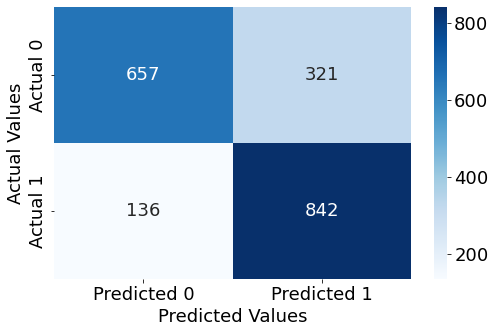

In [56]:
confusion_matrix_data(train,train.Attrition_Yes,logit_model_JobLevel,0.4)

Classification accuracy = 77.6%
Precision = 73.0%
TPR or Recall = 87.5%
FNR = 12.5%
FPR = 32.4%
ROC-AUC = 85.4%


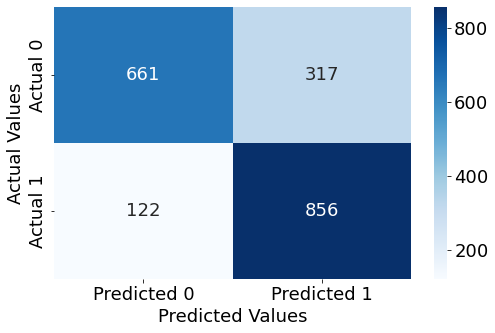

In [57]:
confusion_matrix_data(train,train.Attrition_Yes,logit_model_TotalWorkingYears,0.4)

Classification accuracy = 70.1%
Precision = 33.5%
TPR or Recall = 90.0%
FNR = 10.0%
FPR = 33.7%
ROC-AUC = 85.7%


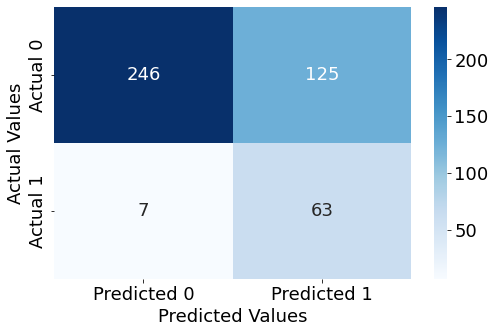

In [58]:
confusion_matrix_data(test,test.Attrition_Yes,logit_model_TotalWorkingYears,0.4)

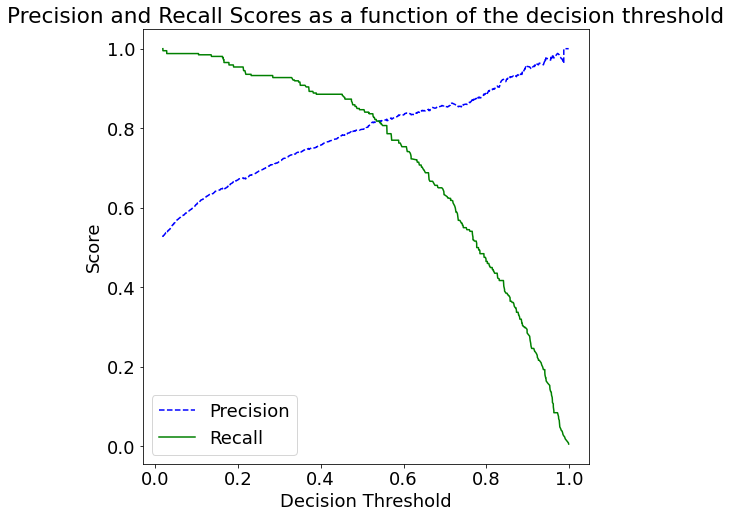

In [59]:
from sklearn.metrics import precision_recall_curve
y=train.Attrition_Yes
ypred = logit_model.predict(train)
p, r, thresholds = precision_recall_curve(y, ypred)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.legend()
plot_precision_recall_vs_threshold(p, r, thresholds)

0.8843294817268245


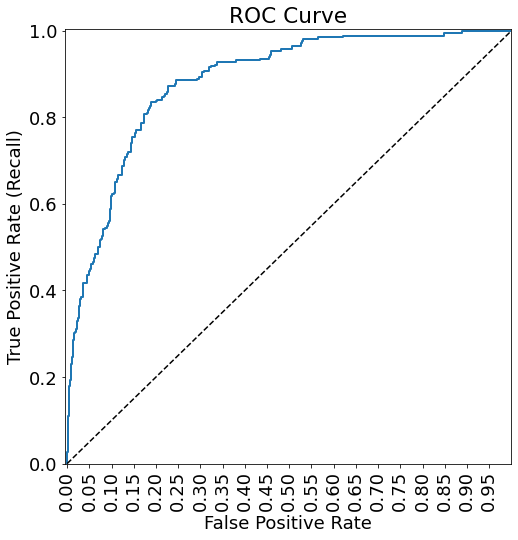

In [60]:
from sklearn.metrics import roc_curve, auc
y=train.Attrition_Yes
ypred = logit_model.predict(train)
fpr, tpr, auc_thresholds = roc_curve(y, ypred)
print(auc(fpr, tpr))# AUC of ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

fpr, tpr, auc_thresholds = roc_curve(y, ypred)
plot_roc_curve(fpr, tpr)

In [102]:
#Model with Interactions
logit_model_interaction1 = sm.logit(formula = 'Attrition_Yes ~ OverTime + StockOptionLevel*JobLevel + JobInvolvement*BusinessTravel + NumCompaniesWorked*Age + JobSatisfaction + EnvironmentSatisfaction + EducationField + WorkLifeBalance + Age*JobLevel + Age*TotalWorkingYears + DistanceFromHome + YearsSinceLastPromotion + YearsInCurrentRole + YearsAtCompany + TotalWorkingYears + YearsWithCurrManager + Gender + PercentSalaryHike', data = train).fit() #Developing logistic regression model


Optimization terminated successfully.
         Current function value: 0.463820
         Iterations 7


Classification accuracy = 71.7%
Precision = 35.1%
TPR or Recall = 92.9%
FNR = 7.1%
FPR = 32.3%
ROC-AUC = 88.0%


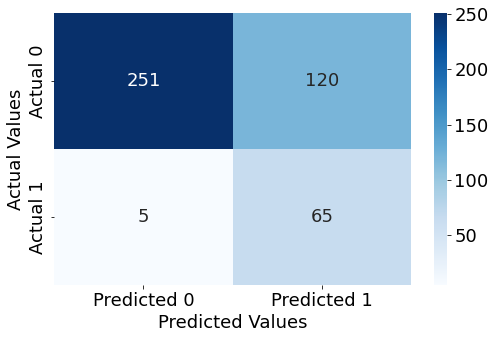

In [103]:
confusion_matrix_data(test,test.Attrition_Yes,logit_model_interaction1,0.4)

# Ways we improved the model after forward selection
- Found collinear predictors (JobLevel and TotalWorkingYears) and found that including TotalWorkingYears made a better model because it had a higher Log-Likelihood, Classification Accuracy, Precision, and Recall

# Final Model ATM: logit_model_TotalWorkingYears